In [45]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('desktop/ab_dataset/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [47]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [48]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [50]:
df['reviews_per_month'].fillna(0,inplace = True)
df['name'].fillna("$",inplace=True)
df['host_name'].fillna("#",inplace=True)
df.drop(['last_review'],axis=1,inplace=True)

In [51]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [52]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [90]:
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

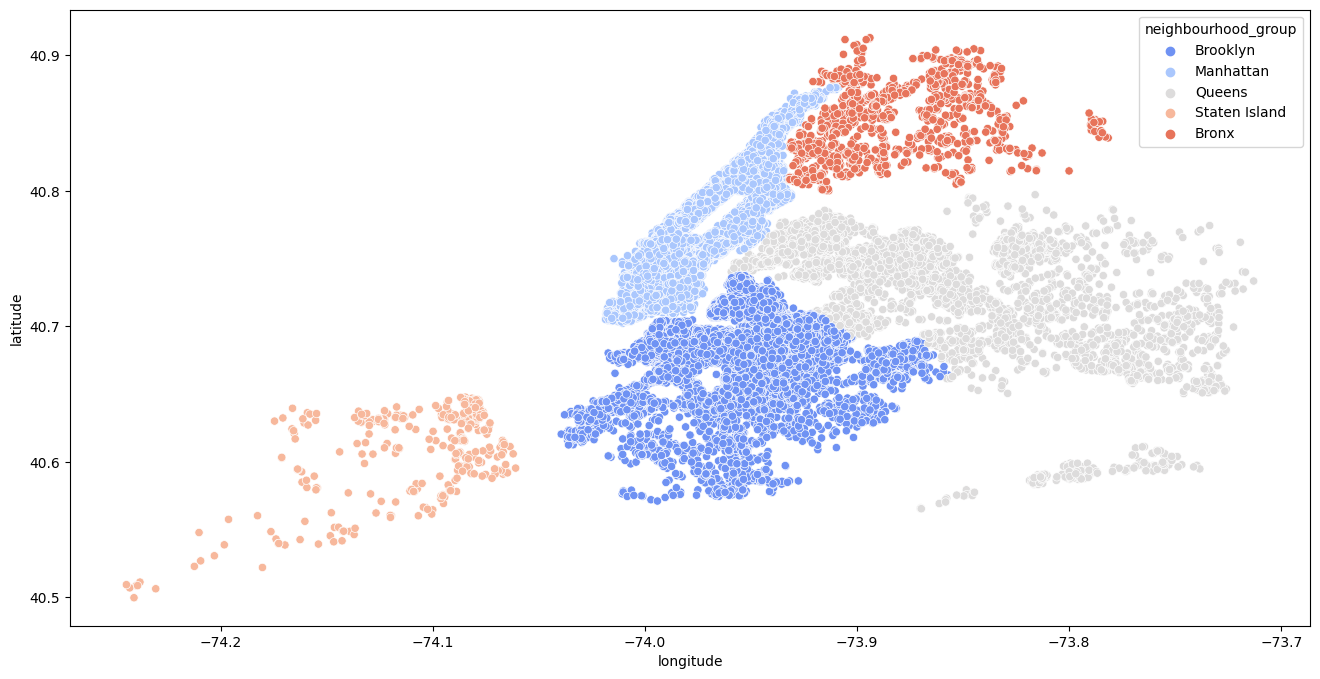

In [63]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.neighbourhood_group,palette="coolwarm")
plt.show()

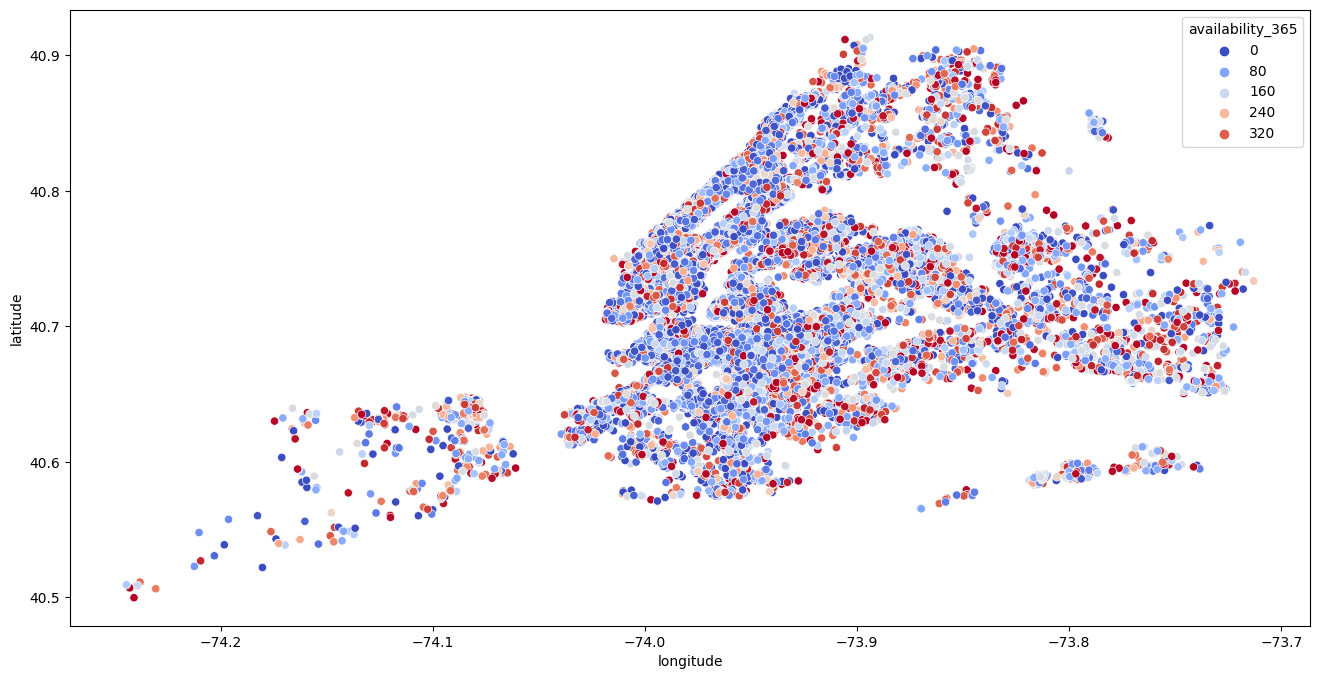

In [77]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.availability_365,palette="coolwarm")
plt.show()

Text(0.5, 1.0, 'Room Type Popularity')

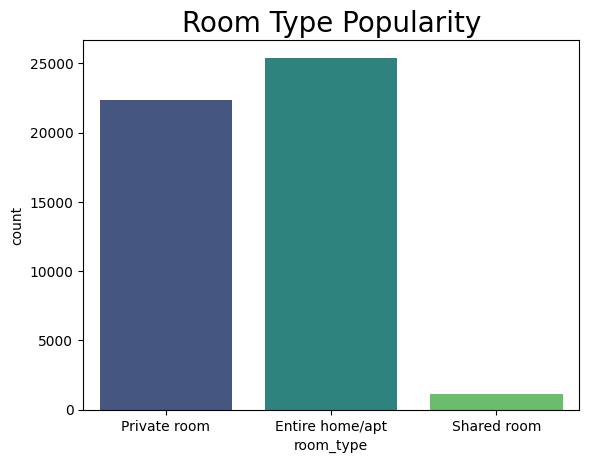

In [105]:
sns.countplot(x='room_type',data=df,palette='viridis')
plt.title("Room Type Popularity",fontsize=20)

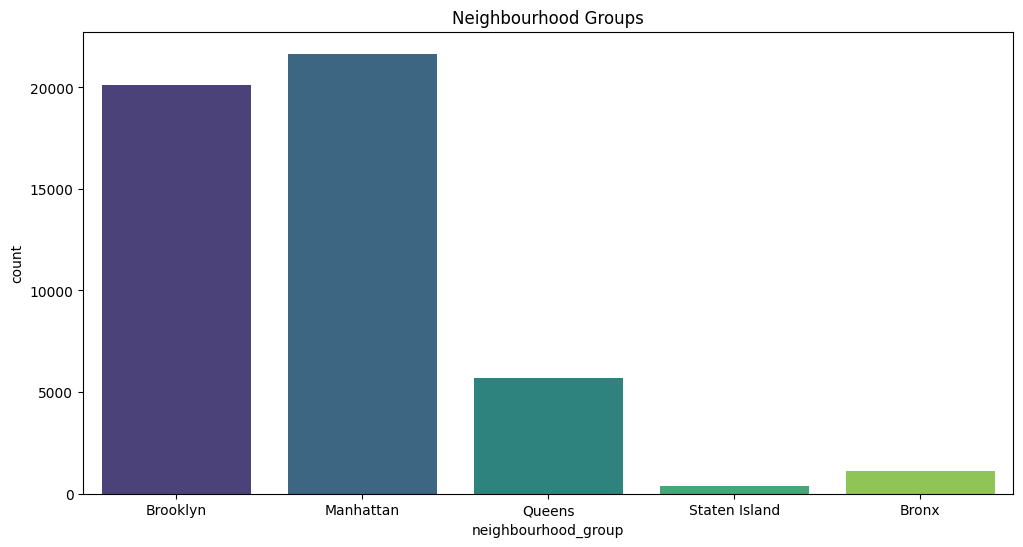

In [103]:
f,ax = plt.subplots(figsize=(12,6))
sns.countplot(x='neighbourhood_group',data=df,palette='viridis')
ax.set_title('Neighbourhood Groups');

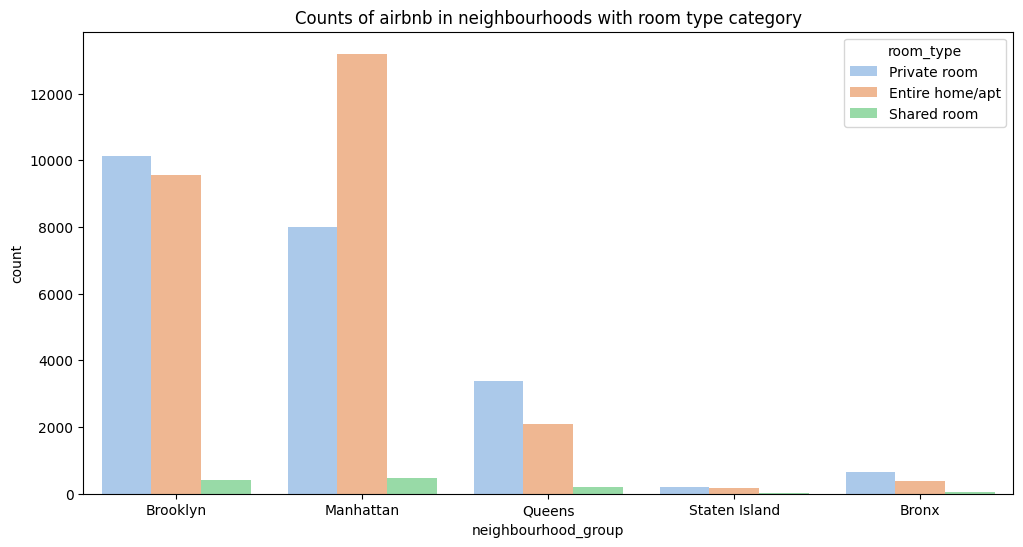

In [104]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='neighbourhood_group', hue='room_type', palette='pastel')
plt.title('Counts of airbnb in neighbourhoods with room type category');

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

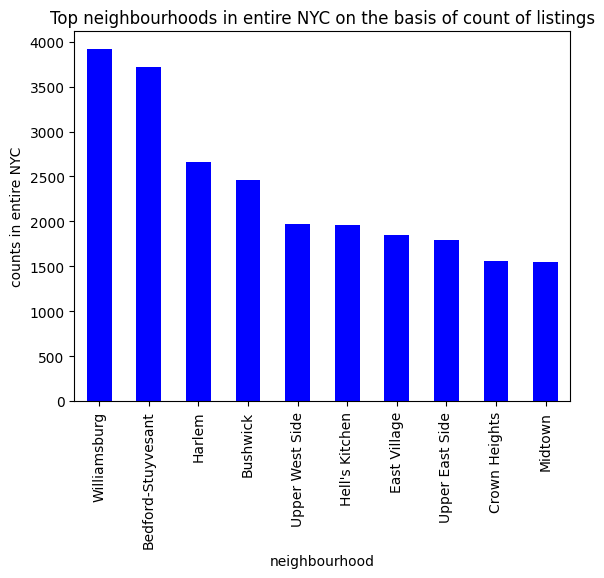

In [110]:
top_10_neigbours= df['neighbourhood'].value_counts()[:10] 
top_10_neigbours.plot(kind='bar',color='b')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

In [123]:
df.nlargest(15,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type','price']]

,name,neighbourhood_group,neighbourhood,host_name,room_type,price
9151,Furnished room in Astoria apartment,Queens,Astoria,Kathrine,Private room,10000
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,Erin,Entire home/apt,10000
29238,1-BR Lincoln Center,Manhattan,Upper West Side,Jelena,Entire home/apt,10000
6530,Spanish Harlem Apt,Manhattan,East Harlem,Olson,Entire home/apt,9999
12342,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,Amy,Private room,9999
40433,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,Lower East Side,Matt,Entire home/apt,9999
30268,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,Tribeca,Rum,Entire home/apt,8500
4377,Film Location,Brooklyn,Clinton Hill,Jessica,Entire home/apt,8000
29662,East 72nd Townhouse by (Hidden by Airbnb),Manhattan,Upper East Side,Sally,Entire home/apt,7703
42523,70' Luxury MotorYacht on the Hudson,Manhattan,Battery Park City,Jack,Entire home/apt,7500


In [122]:
df.nsmallest(15,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type']]

,name,neighbourhood_group,neighbourhood,host_name,room_type
23161,"Huge Brooklyn Brownstone Living, Close to it all.",Brooklyn,Bedford-Stuyvesant,Kimberly,Private room
25433,★Hostel Style Room | Ideal Traveling Buddies★,Bronx,East Morrisania,Anisha,Private room
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Brooklyn,Bushwick,Martial Loft,Private room
25753,"Sunny, Quiet Room in Greenpoint",Brooklyn,Greenpoint,Lauren,Private room
25778,Modern apartment in the heart of Williamsburg,Brooklyn,Williamsburg,Aymeric,Entire home/apt
25794,Spacious comfortable master bedroom with nice ...,Brooklyn,Bedford-Stuyvesant,Adeyemi,Private room
25795,Contemporary bedroom in brownstone with nice view,Brooklyn,Bedford-Stuyvesant,Adeyemi,Private room
25796,Cozy yet spacious private brownstone bedroom,Brooklyn,Bedford-Stuyvesant,Adeyemi,Private room
26259,the best you can find,Manhattan,Murray Hill,Qiuchi,Entire home/apt
26841,Coliving in Brooklyn! Modern design / Shared room,Brooklyn,Bushwick,Sergii,Shared room
